In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt

with open('mask_inventory_20200424.json', 'r', encoding = 'utf-8') as file:
    maskData = json.load(file)
    
print(maskData[0])

{'醫事機構代碼': '0145080011', '醫事機構名稱': '衛生福利部花蓮醫院豐濱原住民分院', '醫事機構地址': '花蓮縣豐濱鄉豐濱村光豐路４１號', '醫事機構電話': '(03)8358141', '成人口罩剩餘數': '9372', '兒童口罩剩餘數': '440', '來源資料時間': '2020/04/21 16:39:11'}


# (1) 顯示目前全台可以領取口罩的據點數、全台成人口罩剩餘數、全台兒童口罩剩餘數。

In [18]:
adt_mask = [int(i['成人口罩剩餘數']) for i in maskData]
chd_mask = [int(i['兒童口罩剩餘數']) for i in maskData]

print('全台可以領取口罩的據點數：{}，成人口罩剩餘數：{}片，兒童口罩剩餘數：{}片'
      .format(len(maskData), sum(adt_mask), sum(chd_mask)))

全台可以領取口罩的據點數：6230，成人口罩剩餘數：26486203片，兒童口罩剩餘數：1071827片


# (2) 顯示目前 '臺中市' 可以領取口罩的據點數以及據點資訊，顯示格式依序是：醫事機構名稱、成人口罩剩餘數、兒童口罩剩餘數、醫事機構電話、醫事機構地址。

In [29]:
#TaichungData = [i for i in maskData if '臺中市' in i['醫事機構地址']]

TChsp_name = [i['醫事機構名稱'] for i in maskData if '臺中市' in i['醫事機構地址']]
TCadt_mask = [int(i['成人口罩剩餘數']) for i in maskData if '臺中市' in i['醫事機構地址']]
TCchd_mask = [int(i['兒童口罩剩餘數']) for i in maskData if '臺中市' in i['醫事機構地址']]
TChsp_tele = [i['醫事機構電話'] for i in maskData if '臺中市' in i['醫事機構地址']]
TChsp_adrs = [i['醫事機構地址'] for i in maskData if '臺中市' in i['醫事機構地址']]

print('臺中市有{}個據點可以領取口罩'.format(len(TChsp_adrs)))

for i in range(len(TChsp_adrs)):
    print('{0:{5}<12}成人：{1:>5}片，兒童：{2:>4}片，電話：{3}，地址：{4}'
          .format(TChsp_name[i], TCadt_mask[i], TCchd_mask[i], TChsp_tele[i], TChsp_adrs[i], chr(12288)))

臺中市有756個據點可以領取口罩
臺中市中西區衛生所　　　成人： 6273片，兒童：   0片，電話：(04)22223811，地址：臺中市西區民權路１０５號
臺中市東區衛生所　　　　成人： 3582片，兒童：   0片，電話：(04)22834121，地址：臺中市東區信義街１４２號
臺中市南區衛生所　　　　成人： 4626片，兒童：   0片，電話：(04)22629735，地址：臺中市南區工學路７２號２樓
臺中市北區衛生所　　　　成人： 5595片，兒童： 257片，電話：(04)22359182，地址：臺中市北區永興街３０１號４樓
臺中市西屯區衛生所　　　成人： 5931片，兒童：  96片，電話：(04)27027068，地址：臺中市西屯區西安里西屯路二段２９９號
臺中市南屯區衛生所　　　成人： 5463片，兒童：   2片，電話：(04)23827640，地址：臺中市南屯區向心南路８１１號１樓
台中市北屯區軍功衛生所　成人： 5903片，兒童： 170片，電話：(04)22393932，地址：臺中市北屯區軍功路二段１６號
台中市北屯區四民衛生所　成人： 5886片，兒童： 130片，電話：(04)24211945，地址：臺中市北屯區后庄路１０６２號
臺中市豐原區衛生所　　　成人： 4086片，兒童： 140片，電話：(04)25261170，地址：臺中市豐原區西勢里中興路１３６號
臺中市東勢區衛生所　　　成人： 6255片，兒童： 260片，電話：(04)25873872，地址：臺中市東勢區中寧里豐勢路４９０號
臺中市大甲區衛生所　　　成人： 4707片，兒童： 160片，電話：(04)26872153，地址：臺中市大甲區德興路８１號
臺中市清水區衛生所　　　成人： 1890片，兒童：   0片，電話：(04)26222639，地址：臺中市清水區中山路９２號
臺中市沙鹿區衛生所　　　成人： 3840片，兒童：   0片，電話：(04)26625040，地址：臺中市沙鹿區洛泉里文昌路２０號
臺中市梧棲區衛生所　　　成人： 3330片，兒童：   0片，電話：(04)26562809，地址：臺中市梧棲區雲集街７０巷３號
臺中市后里區衛生所　　　成人： 5391片，兒童： 210片，電話：(04)25562048，地址：臺中市后里區墩西里公安路８６號
臺中市神岡

# (3) 顯示臺中市的成人、兒童口罩總剩餘數；並將臺中市各據點的成人、兒童口罩剩餘數，繪製成點狀圖 (x 軸是成人、y 軸是兒童)。

臺中市成人、兒童口罩庫存數：2758573片、68583片


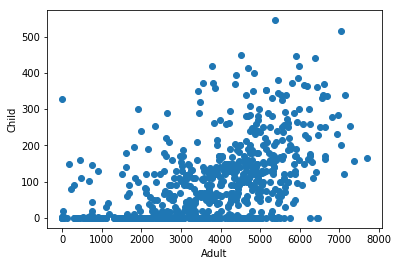

In [5]:
print('臺中市成人、兒童口罩庫存數：{}片、{}片'.format(np.sum(TCadt_mask), np.sum(TCchd_mask)))

plt.plot(TCadt_mask, TCchd_mask, 'o')
plt.xlabel('Adult')
plt.ylabel('Child')
plt.show()

# (4) 顯示臺中市所有衛生所的資訊，顯示格式同(2)。

In [7]:
index = []

for i, name in enumerate(TChsp_name):
    if name[-3:] == '衛生所':
        index.append(i)
        
print('臺中市共有{}間衛生所'.format(len(index)))

for i in index:
    print('{0:{5}<12}成人：{1:>4}片，兒童：{2:>3}片，電話：{3}，地址：{4}'
          .format(TChsp_name[i], TCadt_mask[i], TCchd_mask[i], TChsp_tele[i], TChsp_adrs[i], chr(12288)))

臺中市共有30間衛生所
臺中市中西區衛生所　　　成人：6273片，兒童：  0片，電話：(04)22223811，地址：臺中市西區民權路１０５號
臺中市東區衛生所　　　　成人：3582片，兒童：  0片，電話：(04)22834121，地址：臺中市東區信義街１４２號
臺中市南區衛生所　　　　成人：4626片，兒童：  0片，電話：(04)22629735，地址：臺中市南區工學路７２號２樓
臺中市北區衛生所　　　　成人：5595片，兒童：257片，電話：(04)22359182，地址：臺中市北區永興街３０１號４樓
臺中市西屯區衛生所　　　成人：5931片，兒童： 96片，電話：(04)27027068，地址：臺中市西屯區西安里西屯路二段２９９號
臺中市南屯區衛生所　　　成人：5463片，兒童：  2片，電話：(04)23827640，地址：臺中市南屯區向心南路８１１號１樓
台中市北屯區軍功衛生所　成人：5903片，兒童：170片，電話：(04)22393932，地址：臺中市北屯區軍功路二段１６號
台中市北屯區四民衛生所　成人：5886片，兒童：130片，電話：(04)24211945，地址：臺中市北屯區后庄路１０６２號
臺中市豐原區衛生所　　　成人：4086片，兒童：140片，電話：(04)25261170，地址：臺中市豐原區西勢里中興路１３６號
臺中市東勢區衛生所　　　成人：6255片，兒童：260片，電話：(04)25873872，地址：臺中市東勢區中寧里豐勢路４９０號
臺中市大甲區衛生所　　　成人：4707片，兒童：160片，電話：(04)26872153，地址：臺中市大甲區德興路８１號
臺中市清水區衛生所　　　成人：1890片，兒童：  0片，電話：(04)26222639，地址：臺中市清水區中山路９２號
臺中市沙鹿區衛生所　　　成人：3840片，兒童：  0片，電話：(04)26625040，地址：臺中市沙鹿區洛泉里文昌路２０號
臺中市梧棲區衛生所　　　成人：3330片，兒童：  0片，電話：(04)26562809，地址：臺中市梧棲區雲集街７０巷３號
臺中市后里區衛生所　　　成人：5391片，兒童：210片，電話：(04)25562048，地址：臺中市后里區墩西里公安路８６號
臺中市神岡區衛生所　　　成人：2910片，兒童： 23片，電話：(04)2562

# (5) 顯示在臺中市太平區內可以同時買到成人及兒童口罩的據點資訊，顯示格式同(2)。

In [8]:
index = []

for i, adrs in enumerate(TChsp_adrs):
    if adrs[3:6] == '太平區':
        if TCadt_mask[i] != 0 and TCchd_mask[i] != 0:
            index.append(i)

print('臺中市太平區內同時可買到成人與兒童口罩的據點有{}處'.format(len(index)))

for i in index:
    print('{0:{5}<10}成人：{1:>4}片，兒童：{2:>3}片，電話：{3}，地址：{4}'
          .format(TChsp_name[i], TCadt_mask[i], TCchd_mask[i], TChsp_tele[i], TChsp_adrs[i], chr(12288)))

臺中市太平區內同時可買到成人與兒童口罩的據點有33處
臺中市太平區衛生所　成人：4920片，兒童：179片，電話：(04)23938083，地址：臺中市太平區中山路１段２１３之１號
藥源藥局　　　　　　成人：3366片，兒童： 20片，電話：(04)23955108，地址：臺中市太平區中山路４段２２０號
太平永泰大藥局　　　成人：3510片，兒童： 70片，電話：(04)22757418，地址：臺中市太平區長億六街１０６號
劍橋藥局　　　　　　成人：3645片，兒童： 70片，電話：(04)22776619，地址：臺中市太平區宜昌路５５２號１樓
佑全太平藥局　　　　成人：5711片，兒童：100片，電話：(04)23910016，地址：臺中市太平區樹德路１２１號１樓
安心藥局　　　　　　成人：6255片，兒童：160片，電話：(04)23912042，地址：臺中市太平區中山路３段２８號１樓
欣天然藥局　　　　　成人：5355片，兒童：140片，電話：(04)23982018，地址：臺中市太平區樹德路２９６號１樓
育賢德侑藥局　　　　成人：4016片，兒童： 20片，電話：(04)23920696，地址：臺中市太平區育賢路１０７號、１０９號
信康藥局　　　　　　成人：6966片，兒童：284片，電話：(04)23960697，地址：臺中市太平區樹德路９８－１號
太平中山藥局　　　　成人：5078片，兒童：155片，電話：(04)23959200，地址：臺中市太平區中山路４段１１號
艾兒親子藥局　　　　成人：   4片，兒童：  2片，電話：(04)23923668，地址：臺中市太平區樹孝路２５９號１樓
太平瑞昌藥局　　　　成人：4761片，兒童： 90片，電話：(04)23956319，地址：臺中市太平區新興路２８號
精武丁丁藥局　　　　成人：3636片，兒童： 50片，電話：(04)23957235，地址：臺中市太平區中山路四段１３２－１號
太平惠民藥師藥局　　成人：3525片，兒童：107片，電話：(04)22768799，地址：臺中市太平區東平路３６８號１樓
承泓藥局　　　　　　成人：4014片，兒童： 90片，電話：(04)23935148，地址：臺中市太平區育賢路３６３號１樓
世國藥局　　　　　　成人：7694片，兒童：165片，電話：(04)2275253

# (6) 顯示在臺中市各區的成人、兒童口罩剩餘數統計，並繪製成'點狀圖' (x 軸是成人、y 軸是兒童)。 

臺中市各區的成人、兒童口罩剩餘數統計
霧峰區：　成人： 24395片，兒童：  330片
中區　：　成人： 54020片，兒童： 2581片
豐原區：　成人：170975片，兒童： 2983片
新社區：　成人： 26348片，兒童：  602片
潭子區：　成人： 67650片，兒童： 1119片
外埔區：　成人： 15282片，兒童：  210片
后里區：　成人： 68678片，兒童： 2273片
大安區：　成人： 13077片，兒童：  218片
南屯區：　成人：251652片，兒童： 5924片
東勢區：　成人： 62980片，兒童： 1847片
清水區：　成人： 10647片，兒童：   10片
和平區：　成人： 22098片，兒童：  714片
烏日區：　成人： 55411片，兒童：  685片
西屯區：　成人：330288片，兒童： 8072片
南區　：　成人： 95833片，兒童： 2202片
大甲區：　成人： 51700片，兒童：  791片
北屯區：　成人：371173片，兒童：10916片
大肚區：　成人： 32892片，兒童：  180片
大里區：　成人：195069片，兒童： 2584片
龍井區：　成人： 43155片，兒童：  749片
西區　：　成人：195080片，兒童： 7247片
沙鹿區：　成人： 47679片，兒童：   25片
石岡區：　成人：  6601片，兒童：  125片
東區　：　成人： 84954片，兒童： 2445片
神岡區：　成人： 19052片，兒童：  156片
大雅區：　成人： 24509片，兒童：   92片
北區　：　成人：209869片，兒童：10025片
太平區：　成人：189698片，兒童： 3468片
梧棲區：　成人： 17808片，兒童：   10片


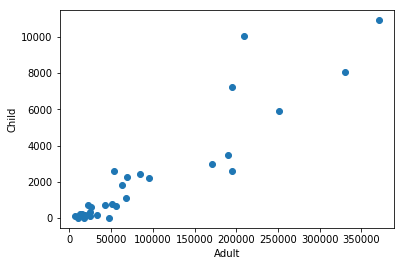

In [10]:
print('臺中市各區的成人、兒童口罩剩餘數統計')

district = ['霧峰區', '中區', '豐原區', '新社區', '潭子區', '外埔區', '后里區', '大安區', '南屯區', '東勢區',
           '清水區', '和平區', '烏日區', '西屯區', '南區', '大甲區', '北屯區', '大肚區', '大里區', '龍井區',
           '西區', '沙鹿區', '石岡區', '東區', '神岡區', '大雅區', '北區', '太平區', '梧棲區']

adt_maskSUM, chd_maskSUM = [0] * 29, [0] * 29

for i, adrs in enumerate(TChsp_adrs):
    for j, dic in enumerate(district):
        if j == 1 or j == 14 or j == 20 or j == 23 or j == 26:
            if adrs[3:5] == dic:
                adt_maskSUM[j] += TCadt_mask[i]
                chd_maskSUM[j] += TCchd_mask[i]
        else:
            if adrs[3:6] == dic:
                adt_maskSUM[j] += TCadt_mask[i]
                chd_maskSUM[j] += TCchd_mask[i]
                
for i in range(len(district)):
    print('{0:{3}<3}：　成人：{1:>6}片，兒童：{2:>5}片'
          .format(district[i], adt_maskSUM[i], chd_maskSUM[i], chr(12288)))
#plt.figure(figsize = (10, 5))    
plt.plot(adt_maskSUM, chd_maskSUM, 'o')
plt.xlabel('Adult')
plt.ylabel('Child')
plt.show()